In [1]:
from pathlib import Path
import pandas as pd
from itertools import chain

C:\Users\Bobinski\AppData\Local\Temp\ipykernel_27040\2866561572.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# copy the data to your drive and then modify this path as required
#from google.colab import drive
#drive.mount('/content/drive')

folder = '/'

In [3]:
# base query for generating the cohort

# (anyone who has a diagnosis of breast cancer OR had at least one dose of doxorubicin OR at least one dose of cyclophosphomide)

# N.B. - these data are synthetically generated and therefore not really representative, but should give you a handle on how to
# interact with the concepts and data structures. That's why there are no breast cancer patients who had breast cancer AND
# the drugs of interest, which would be very common in the real world, but it's definitely adequate to get started.

# SELECT distinct(de.person_id)
# FROM
# `bigquery-public-data.cms_synthetic_patient_data_omop.drug_exposure` as de join
# `bigquery-public-data.cms_synthetic_patient_data_omop.concept` as c on c.concept_id = de.drug_concept_id join
# `bigquery-public-data.cms_synthetic_patient_data_omop.drug_exposure` as de2 on de.person_id = de2.person_id join
# `bigquery-public-data.cms_synthetic_patient_data_omop.concept` as c2 on c2.concept_id = de2.drug_concept_id join
# `bigquery-public-data.cms_synthetic_patient_data_omop.condition_occurrence` as co on co.person_id = de.person_id join
# `bigquery-public-data.cms_synthetic_patient_data_omop.concept` as c3 on c3.concept_id = co.condition_concept_id
# where upper(c.concept_name) like '%DOXORUBICIN%'
# or upper(c2.concept_name) like '%CYCLOPHOSPHAMIDE%'
# or upper(c3.concept_name) LIKE '%NEOPLASM%BREAST%'
# LIMIT 1000

In [4]:
# ended up downloading them separately because it was too slow combined...

cohort_files = pd.concat([pd.read_csv(f'cyclo.csv'),
                          pd.read_csv(f'doxo.csv'),
                          pd.read_csv(f'breast.csv')])

In [5]:
# copy this as filter to next queries
print(list(cohort_files.person_id.unique()))

# select *
# from `bigquery-public-data.cms_synthetic_patient_data_omop.drug_exposure` as p
# where p.person_id in (...)

[34264, 1831389, 1837806, 2310450, 1248484, 1714414, 521774, 631675, 590549, 1280121, 814682, 2290407, 1625197, 735131, 466977, 209715, 1430267, 1182028, 1165588, 1106461, 1468438, 2175189, 432263, 444171, 1543781, 231076, 872056, 1446685, 551750, 2123373, 111524, 842407, 97811, 972509, 1209109, 2226072, 15774, 1926330, 1803727, 1700768, 1310261, 1578344, 1552307, 982777, 1891818, 1474113, 300897, 480332, 1643511, 834599, 802675, 2204122, 1184581, 630317, 734042, 1634794, 1318586, 410172, 1082636, 2069725, 728477, 2065075, 130548, 354814, 176998, 2322313, 602889, 1695684, 772562, 802704, 941902, 66628, 2272016, 995659, 1981787, 463001, 111495, 1874152, 1985714, 1070806, 196046, 375476, 454192, 2307493, 632332, 885729, 1768422, 2208165, 1683620, 285627, 1688200, 712573, 1422194, 1384708, 380923, 18864, 932312, 2045839, 1836155, 1694628, 1719016, 1308273, 520526, 1774882, 1236041, 2213635, 446614, 1150520, 2282821, 1414467, 1864382, 1789552, 1110633, 642697, 1175894, 1277542, 1278399, 95

In [6]:
person = pd.read_csv('person.csv')
condition_occurrence = pd.read_csv('condition_occurrence.csv')
drug_exposure = pd.read_csv('drug_exposure.csv')
concept = pd.read_csv('concept.csv')

In [7]:
print(list(person.location_id.unique()))

[247, 994, 197, 2296, 84, 204, 1035, 599, 1621, 62, 158, 2592, 2659, 1670, 1776, 268, 509, 1730, 665, 355, 57, 78, 1444, 43, 1416, 99, 2696, 391, 1486, 1533, 63, 143, 35, 307, 123, 86, 2605, 572, 385, 229, 1085, 85, 146, 25, 258, 440, 167, 30, 1471, 235, 87, 713, 2817, 1413, 1270, 1525, 1160, 281, 462, 475, 2067, 2755, 1480, 464, 46, 1650, 36, 237, 69, 515, 1338, 183, 80, 135, 8, 249, 341, 170, 239, 473, 52, 2073, 904, 1982, 754, 345, 1324, 609, 176, 1493, 681, 1216, 222, 188, 1734, 752, 39, 1229, 666, 519, 1456, 79, 11, 22, 644, 773, 458, 866, 574, 150, 7, 897, 2462, 940, 60, 2448, 228, 6, 161, 886, 348, 556, 2009, 233, 213, 125, 346, 734, 454, 72, 457, 243, 2225, 339, 915, 1341, 976, 19, 263, 478, 2570, 18, 384, 1196, 34, 220, 279, 618, 332, 156, 1377, 115, 349, 54, 453, 1693, 1391, 860, 17, 728, 788, 782, 1562, 499, 771, 1838, 738, 169, 416, 350, 166, 273, 89, 820, 1902, 1362, 1224, 145, 1022, 1973, 100, 698, 941, 1434, 889, 286, 109, 756, 392, 1124, 403, 2096, 1695, 536, 139, 872, 

In [8]:
location = pd.read_csv('location.csv')

In [9]:
concept_lookup = {c.concept_id: c.concept_name for c in concept.itertuples()}

In [10]:
def make_labels(df):
    for c in df.columns:
        if 'concept_id' in c:
            df[c.replace('_id', '_label')] = df[c].map(concept_lookup)
        if 'concept_id' in c or 'source' in c or len(df[df[c].notna()])==0:
            df = df.drop(c, axis=1)
    return df

In [11]:
person_labelled = make_labels(person)
condition_occurrence_labelled = make_labels(condition_occurrence)
drug_exposure_labelled = make_labels(drug_exposure)
location_labelled = make_labels(location)

In [12]:
drug_exposure_labelled[drug_exposure_labelled.drug_concept_label.str.contains('cyclo', case=False, na=False)]

,quantity,days_supply,provider_id,visit_occurrence_id,drug_exposure_id,person_id,drug_exposure_start_date,drug_exposure_end_date,drug_type_concept_label,route_concept_label,drug_source_concept_label,drug_concept_label
57,NaN,NaN,23474.0,81813296.0,92390894,1705545,2008-07-26,2008-08-25,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
72,NaN,NaN,9702.0,56640626.0,63969518,1180817,2010-09-11,2010-10-11,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
105,NaN,NaN,80800.0,31694765.0,35802450,660730,2009-05-18,2009-06-17,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
132,NaN,NaN,1958.0,17096702.0,19316236,356382,2009-06-05,2009-07-05,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
190,NaN,NaN,242930.0,17413024.0,19666028,362949,2010-12-11,2011-01-10,Prescription dispensed in pharmacy,NaN,"Cyclophosphamide, 100 mg",cyclophosphamide
...,...,...,...,...,...,...,...,...,...,...,...,...
58552,NaN,NaN,32757.0,24741477.0,27954759,515736,2009-06-16,2009-07-16,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
58585,NaN,NaN,264523.0,27085584.0,30596869,564733,2008-10-31,2008-11-30,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
58602,NaN,NaN,18010.0,86212415.0,97352261,1797359,2008-02-24,2008-03-25,Prescription dispensed in pharmacy,NaN,"Cyclophosphamide, 100 mg",cyclophosphamide
58653,NaN,NaN,37444.0,40047022.0,45232162,834673,2010-05-07,2010-06-06,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide


In [13]:
person_labelled.head()

,location_id,person_id,year_of_birth,month_of_birth,day_of_birth,race_concept_label,ethnicity_concept_label,gender_source_concept_label,race_source_concept_label,ethnicity_source_concept_label,gender_concept_label
0,247,1468935,1920,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
1,994,2299017,1923,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
2,197,1238988,1924,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
3,2296,1712715,1934,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE
4,84,899595,1941,1,1,White,Not Hispanic or Latino,NaN,NaN,NaN,MALE


In [14]:
location_labelled.head()

,location_id,state,county
0,153,54,54999
1,697,54,54170
2,754,54,54110
3,1103,54,54010
4,1314,54,54330


In [15]:
condition_occurrence_labelled.head()

,condition_occurrence_id,person_id,condition_start_date,condition_end_date,provider_id,visit_occurrence_id,condition_concept_label,condition_type_concept_label,condition_source_concept_label,condition_status_concept_label
0,61875376,497795,2008-01-31,2008-02-07,142878.0,23882463,Sepsis,Inpatient header - 1st position,Unspecified septicemia,NaN
1,137844436,1109737,2008-12-12,2008-12-14,34304.0,53218870,Tinea pedis,Inpatient header - 1st position,Dermatophytosis of foot,NaN
2,236827453,1906124,2008-09-28,2008-10-06,83387.0,91427916,Primary malignant neoplasm of rectosigmoid jun...,Inpatient header - 1st position,Malignant neoplasm of rectosigmoid junction,NaN
3,116917366,940851,2009-03-10,2009-03-17,323636.0,45136153,Hyperosmolality and or hypernatremia,Inpatient header - 1st position,Hyperosmolality and/or hypernatremia,NaN
4,171844758,1382957,2009-05-24,2009-05-25,228426.0,66341079,Hypokalemia,Inpatient header - 1st position,Hypopotassemia,NaN


In [16]:
condition_occurrence_labelled.condition_concept_label.value_counts()

condition_concept_label
No matching concept                                     482
Respiratory symptom                                     479
Arthralgia of the lower leg                             453
Conduction disorder of the heart                        450
Onychomycosis due to dermatophyte                       442
                                                       ... 
Cervical incompetence                                     1
Abscess of vulva                                          1
Vitreous membranes                                        1
Pneumonia due to infection by Streptococcus pyogenes      1
Congenital anomaly of renal blood vessel                  1
Name: count, Length: 3516, dtype: int64

In [17]:
drug_exposure_labelled.head()

,quantity,days_supply,provider_id,visit_occurrence_id,drug_exposure_id,person_id,drug_exposure_start_date,drug_exposure_end_date,drug_type_concept_label,route_concept_label,drug_source_concept_label,drug_concept_label
0,NaN,NaN,863663.0,76695624.0,86600285,1598595,2008-06-22,2008-07-22,Prescription dispensed in pharmacy,NaN,"Injection, heparin sodium, per 1000 units",heparin
1,NaN,NaN,384672.0,38923637.0,43976665,811406,2009-03-05,2009-04-04,Prescription dispensed in pharmacy,NaN,"Ringers lactate infusion, up to 1000 cc",No matching concept
2,NaN,NaN,324470.0,34297861.0,38734825,714867,2009-03-05,2009-04-04,Prescription dispensed in pharmacy,NaN,"Injection, etoposide, 10 mg",etoposide Injectable Solution
3,NaN,NaN,9394.0,9226327.0,10408194,192083,2009-11-17,2009-12-17,Prescription dispensed in pharmacy,NaN,"Injection, paricalcitol, 1 mcg",paricalcitol Injectable Solution
4,NaN,NaN,499713.0,69401622.0,78375973,1446685,2010-07-31,2010-08-30,Prescription dispensed in pharmacy,NaN,"Injection, azacitidine, 1 mg",azacitidine


In [18]:
drug_exposure_labelled[drug_exposure_labelled.drug_concept_label.str.contains('cyclophosphamide', na=False, case=False)]

,quantity,days_supply,provider_id,visit_occurrence_id,drug_exposure_id,person_id,drug_exposure_start_date,drug_exposure_end_date,drug_type_concept_label,route_concept_label,drug_source_concept_label,drug_concept_label
57,NaN,NaN,23474.0,81813296.0,92390894,1705545,2008-07-26,2008-08-25,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
72,NaN,NaN,9702.0,56640626.0,63969518,1180817,2010-09-11,2010-10-11,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
105,NaN,NaN,80800.0,31694765.0,35802450,660730,2009-05-18,2009-06-17,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
132,NaN,NaN,1958.0,17096702.0,19316236,356382,2009-06-05,2009-07-05,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
190,NaN,NaN,242930.0,17413024.0,19666028,362949,2010-12-11,2011-01-10,Prescription dispensed in pharmacy,NaN,"Cyclophosphamide, 100 mg",cyclophosphamide
...,...,...,...,...,...,...,...,...,...,...,...,...
58552,NaN,NaN,32757.0,24741477.0,27954759,515736,2009-06-16,2009-07-16,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
58585,NaN,NaN,264523.0,27085584.0,30596869,564733,2008-10-31,2008-11-30,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide
58602,NaN,NaN,18010.0,86212415.0,97352261,1797359,2008-02-24,2008-03-25,Prescription dispensed in pharmacy,NaN,"Cyclophosphamide, 100 mg",cyclophosphamide
58653,NaN,NaN,37444.0,40047022.0,45232162,834673,2010-05-07,2010-06-06,Prescription dispensed in pharmacy,NaN,NaN,cyclophosphamide


In [19]:
drug_exposure[drug_exposure.drug_concept_id==1338512]

,drug_type_concept_id,stop_reason,refills,quantity,days_supply,sig,route_concept_id,lot_number,provider_id,visit_occurrence_id,...,dose_unit_source_value,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,verbatim_end_date,drug_type_concept_label
31,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180600.0,61474886.0,...,NaN,69427952,1281491,1338512,2009-03-23,NaN,2009-04-22,NaN,NaN,Prescription dispensed in pharmacy
212,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,8501998.0,...,NaN,9586359,176998,1338512,2008-03-14,NaN,2008-04-13,NaN,NaN,Prescription dispensed in pharmacy
279,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29781.0,32746694.0,...,NaN,36987878,682586,1338512,2009-09-19,NaN,2009-10-19,NaN,NaN,Prescription dispensed in pharmacy
1636,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325192.0,33104828.0,...,NaN,37392665,690103,1338512,2008-07-06,NaN,2008-08-05,NaN,NaN,Prescription dispensed in pharmacy
1683,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310084.0,12228235.0,...,NaN,13814862,254770,1338512,2009-04-14,NaN,2009-05-14,NaN,NaN,Prescription dispensed in pharmacy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56938,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193694.0,42989822.0,...,NaN,48558242,896006,1338512,2008-10-21,NaN,2008-11-20,NaN,NaN,Prescription dispensed in pharmacy
56959,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289.0,63254865.0,...,NaN,71442521,1318628,1338512,2010-04-04,NaN,2010-05-04,NaN,NaN,Prescription dispensed in pharmacy
56960,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,266353.0,80027475.0,...,NaN,90376066,1668396,1338512,2010-04-04,NaN,2010-05-04,NaN,NaN,Prescription dispensed in pharmacy
57057,38000175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139062.0,27978160.0,...,NaN,31601083,583393,1338512,2009-01-06,NaN,2009-02-05,NaN,NaN,Prescription dispensed in pharmacy


In [20]:
pd.options.display.max_rows = 40000
valcou = drug_exposure_labelled.drug_concept_label.value_counts().rename_axis('unique_values').reset_index(name='counts')
print (valcou)

                                          unique_values  counts
0                                   No matching concept    2185
1                                          epoetin alfa    1845
2                      paricalcitol Injectable Solution     911
3                   sodium chloride Injectable Solution     671
4                                    dexamethasone 1 MG     619
5                        oxygen 99 % Gas for Inhalation     541
6                                           ondansetron     344
7                                             midazolam     325
8         omeprazole 20 MG Delayed Release Oral Capsule     324
9                                      vitamin B12 1 MG     318
10                                     cyclophosphamide     311
11                                              heparin     311
12                                      fentanyl 0.1 MG     280
13                  doxercalciferol Injectable Solution     270
14                       gemfibrozil 600

In [21]:
#shrink df
small = drug_exposure_labelled[['person_id', 'drug_exposure_start_date', 'drug_concept_label']]
small.fillna('N/A', inplace=True)
print(small)

       person_id drug_exposure_start_date  \
0        1598595               2008-06-22   
1         811406               2009-03-05   
2         714867               2009-03-05   
3         192083               2009-11-17   
4        1446685               2010-07-31   
...          ...                      ...   
58828    1033812               2008-10-11   
58829     398617               2009-06-26   
58830     200312               2009-06-28   
58831    1874020               2010-11-22   
58832     528657               2008-10-16   

                                      drug_concept_label  
0                                                heparin  
1                                    No matching concept  
2                          etoposide Injectable Solution  
3                       paricalcitol Injectable Solution  
4                                            azacitidine  
...                                                  ...  
58828  aspirin 389 MG / caffeine 32.4 MG / pro

C:\Users\Bobinski\AppData\Local\Temp\ipykernel_27040\2579147206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small.fillna('N/A', inplace=True)


In [22]:
small['drug_concept_label'] = small.groupby(['person_id', 'drug_exposure_start_date'])['drug_concept_label'].transform(lambda x : ' & '.join(x))
print(small)

       person_id drug_exposure_start_date  \
0        1598595               2008-06-22   
1         811406               2009-03-05   
2         714867               2009-03-05   
3         192083               2009-11-17   
4        1446685               2010-07-31   
...          ...                      ...   
58828    1033812               2008-10-11   
58829     398617               2009-06-26   
58830     200312               2009-06-28   
58831    1874020               2010-11-22   
58832     528657               2008-10-16   

                                      drug_concept_label  
0                                                heparin  
1                                    No matching concept  
2      etoposide Injectable Solution & cyclophosphami...  
3      paricalcitol Injectable Solution & paricalcito...  
4            azacitidine & etoposide Injectable Solution  
...                                                  ...  
58828  aspirin 389 MG / caffeine 32.4 MG / pro

C:\Users\Bobinski\AppData\Local\Temp\ipykernel_27040\169222152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['drug_concept_label'] = small.groupby(['person_id', 'drug_exposure_start_date'])['drug_concept_label'].transform(lambda x : ' & '.join(x))


In [23]:
smalldd = small.drop_duplicates()
print(smalldd)

       person_id drug_exposure_start_date  \
0        1598595               2008-06-22   
1         811406               2009-03-05   
2         714867               2009-03-05   
3         192083               2009-11-17   
4        1446685               2010-07-31   
...          ...                      ...   
58828    1033812               2008-10-11   
58829     398617               2009-06-26   
58830     200312               2009-06-28   
58831    1874020               2010-11-22   
58832     528657               2008-10-16   

                                      drug_concept_label  
0                                                heparin  
1                                    No matching concept  
2      etoposide Injectable Solution & cyclophosphami...  
3      paricalcitol Injectable Solution & paricalcito...  
4            azacitidine & etoposide Injectable Solution  
...                                                  ...  
58828  aspirin 389 MG / caffeine 32.4 MG / pro

In [24]:
# https://stackoverflow.com/questions/60829670/how-to-find-repeated-patients-and-add-a-new-column
import datetime as dt
import numpy as np

In [25]:
readministrations = pd.Series(np.zeros(len(smalldd),dtype=int),index=smalldd.index)

In [26]:
# Loop through all unique ids                                                                                                                                                                                      
all_id = smalldd['person_id'].unique()
id_administrations = {}
for pid in all_id:
    # These are all the times a patient with a given ID has had surgery                                                                                                                                            
    patient = smalldd.loc[smalldd['person_id']==pid]
    administrations_sorted = pd.to_datetime(patient['drug_exposure_start_date'], format='%Y-%m-%d').sort_values()

# This checks if the previous surgery was longer than 180 days ago                                                                                                                                              
    frequency = administrations_sorted.diff()<dt.timedelta(days=6000)

    # Compute the readmission                                                                                                                                                                                      
    n_administrations = [0]
    for v in frequency.values[1:]:
       n_administrations.append((n_administrations[-1]+1)*v)

    # Add these value to the time series                                                                                                                                                                           
    readministrations.loc[administrations_sorted.index] = n_administrations

smalldd['readministration'] = readministrations

C:\Users\Bobinski\AppData\Local\Temp\ipykernel_27040\3509898221.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldd['readministration'] = readministrations


In [27]:
#print(smalldd)
#smalldd[smalldd.person_id==200312].sort_values(by='drug_exposure_start_date', ascending=True)
#61 appointments for this person

In [28]:
smalldd['readministration'] = smalldd['readministration']
pivoted = smalldd.pivot(index='person_id', columns='readministration', values='drug_concept_label')

C:\Users\Bobinski\AppData\Local\Temp\ipykernel_27040\520220569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smalldd['readministration'] = smalldd['readministration']


In [29]:
pivoted.head()

readministration,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
person_id,,,,,,,,,,,,,,,,,,,,,
1279,N/A,testosterone,24 HR divalproex sodium 500 MG Extended Releas...,N/A,metolazone 5 MG Oral Tablet,No matching concept,warfarin sodium 5 MG Oral Tablet,warfarin sodium 5 MG Oral Tablet [Coumadin],levothyroxine sodium 0.15 MG Oral Tablet [Synt...,ibuprofen 600 MG Oral Tablet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1289,trazodone hydrochloride 100 MG Oral Tablet,N/A,verapamil hydrochloride 180 MG Extended Releas...,spironolactone 100 MG Oral Tablet,doxazosin 1 MG Oral Tablet [Cardura],quinine sulfate 324 MG Oral Capsule,alprazolam 0.25 MG Oral Tablet,doxepin 150 MG Oral Capsule,rabeprazole sodium 20 MG Delayed Release Oral ...,modafinil 200 MG Oral Tablet,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1319,darbepoetin alfa & epoetin alfa & epoetin alfa,oxygen 99.2 % Gas for Inhalation,ceftriaxone 500 MG Injection,24 HR isosorbide mononitrate 120 MG Extended R...,N/A,N/A,acetaminophen 650 MG / propoxyphene napsylate ...,topiramate 200 MG Oral Tablet,trazodone hydrochloride 100 MG Oral Tablet,acetaminophen 300 MG / codeine phosphate 30 MG...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5090,acetaminophen 300 MG / codeine phosphate 30 MG...,triamcinolone acetonide 40 MG/ML Injectable Su...,No matching concept,potassium chloride 8 MEQ Extended Release Oral...,Glucose 50 MG/ML / Sodium Chloride 0.154 MEQ/M...,N/A,epoetin alfa,acetaminophen 500 MG / hydrocodone bitartrate ...,ranitidine Injectable Solution & dexamethasone...,carboplatin Injectable Solution & N/A & potass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5709,No matching concept,N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


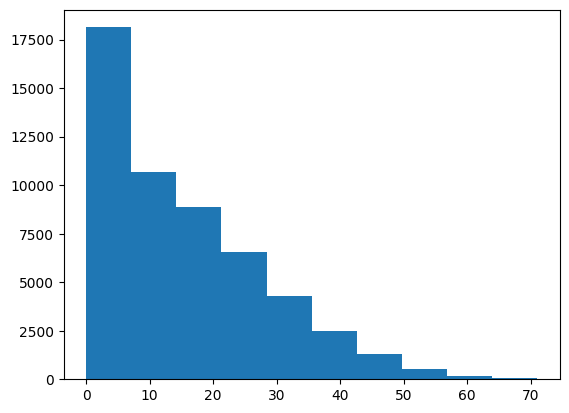

In [33]:
import matplotlib.pyplot as plt
plt.hist(smalldd['readministration'])
plt.show() 

In [ ]:
shrinked = pivoted